# Breast Cancer Classification Model A

### [Let's Connect on LinkedIn - Prince Peter](https://www.linkedin.com/in/peter-prince/)

In this Part, I want to look specifically at how to assess the performance of a logistic regression model using various binary classification metrics such as accuracy, precision, recall, and the F1 score on the Breast Cancer Wisconsin (Diagnostic) dataset used in the Part A of this classification model

First we ned to train a model in order to assess its performance

## 1. Building a logistic regression model

### 1.1 The dataset

Let's use a classic binary classification dataset for this task: the `Wisconsin Breast Cancer` dataset. It consists of **569 observations** with **30 predictors** and a single binary response variable.

Each observation is the result of a scan on a mass of breast tissue for the purpose of **diagnosing or dismissing breast cancer** in a patient.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Import dataset
from sklearn.datasets import load_breast_cancer

# Suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load dataset
data = load_breast_cancer()

In [4]:
# list of features
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# list of target
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

The **target variable**, which we will store in the DataFrame `y`, consists of two classes, each referring to the diagnosis of a scan of a mass of breast tissue:

- **1**: the mass is benign.
- **0**: the mass is malignant.

In [6]:
# Convert to DataFrame for easier manipulation
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

## EDA- A quick look into the dataset
**Understanding the data**

Here, I will to explore and understand both dataframes by using  `head()`, `describe()` , `info()` etc


In [7]:
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  569 non-null    int32
dtypes: int32(1)
memory usage: 2.4 KB


In [12]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.627417,0.483918,0.0,0.0,1.0,1.0,1.0


### 1.2 Training the model

In [13]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Before we move on, let's take a look at the **distribution of observations** between the two classes.

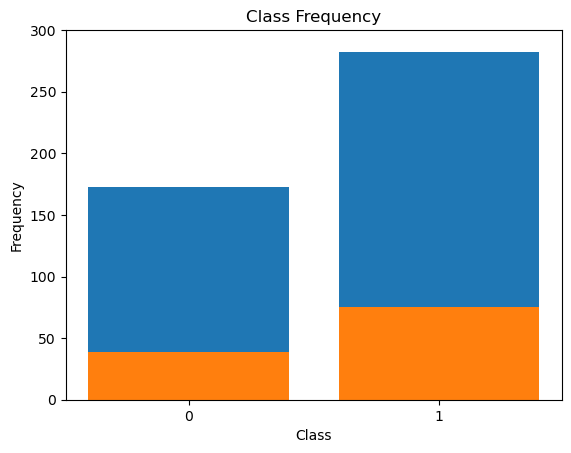

target
1         357
0         212
Name: count, dtype: int64

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1], labels=[0,1])
plt.ylim(top=300)

plt.show()
y.value_counts()

### Take note of the **imbalance** here: there are 357 observations in class 1 and only 212 in class 0.

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Create logistic regression model instance
lm = LogisticRegression()

In [17]:
# Train the logistic regression model
lm.fit(X_train,y_train)

LogisticRegression()

In [18]:
# Get the model intercept
lm.intercept_[0]

0.09209018843945668

In [19]:
# Get the model coefficients
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
mean radius,0.544811
mean texture,0.242001
mean perimeter,0.603044
mean area,-0.029883
mean smoothness,-0.015641


In [20]:
# Get predictions
pred_lm = lm.predict(X_test)

I have made some predictions on the test data. Now, I want to compare those predictions to the ground truth labels of the test dataset and determine how well the model has actually performed.

## 2. Assessing model performance using the confusion matrix

A confusion matrix is a table that describes the performance of a classification model, or classifier, on a set of test data for which the true values are known.

Below are the related terminology, each referring to a separate cell in the confusion matrix above. Note that they represent whole numbers and not proportions.

- **True negatives (TN)**: These are cases in which we predicted a negative result, and the true result is also negative.
- **True positives (TP)**: We predicted a positive result and the true result is positive.
- **False positives (FP)**: We predicted a positive result, but the true result is negative. Also known as a **Type I error**.
- **False negatives (FN)**: We predicted a negative result, but the true result is positive. Also known as a **Type II error**.


### 2.1 Confusion matrix in `sklearn`

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, pred_lm)

array([[36,  3],
       [ 5, 70]], dtype=int64)

In [23]:
#converting our confusion matrix to a dataframe

labels = ['0: Malignant', '1: Benign']
pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

,0: Malignant,1: Benign
0: Malignant,36,3
1: Benign,5,70


#### Interpretation:

- Each **row** represents the **ground truth totals** for _Malignant_ and _Benign_. In other words, the sum of all the values in the first row is the total number of observations in our test dataset labelled _Malignant_.

- Each **column** represents the **totals for the predictions** in each of _Malignant_ and _Benign_.

- The **intersection** of each row/column gives us a different aspect of the results: **TP**, **TN**, **FP**, or **FN**

## 3. Assessing model performance using the classification report

The **classification report** gives us more information on where our model is going wrong – looking specifically at the performance caused by **Type I and II errors**.  


### 3.1 Precision

**Answers:** When it predicts `yes`, how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

### 3.2 Recall

**Answers:** When the outcome is actually `yes`, how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

### 3.3 F1 score

**Answers:** What is the weighted average of precision and recall? 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

F1 score might be a better measure to use if we need to **seek a balance** between precision and recall _and_ there is an **uneven class** distribution (large number of 1s vs 0s or vice versa).

### 3.4 Classification report in `sklearn`

In [24]:
from sklearn.metrics import classification_report

In [25]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: Malignant', '1: Benign']))

Classification Report
              precision    recall  f1-score   support

0: Malignant       0.88      0.92      0.90        39
   1: Benign       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



#### Interpretation

We now have a far more comprehensive view of the performance of our model.

- Clearly, the precision, recall, and F1 score **values for the Benign class are higher**, and this has to do with the class imbalance we referred to earlier in the tutorial. There are more observations with the Benign label, so the model gets **_better_** at classifying those ones because it has more evidence of them.

- The corresponding **values in the Malignant class are lower** for the same reason.

- The **weighted F1 score** here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

- Perhaps the most important information in the above table is in the last row, indicating the weighted average.

- Unlike the values in the `macro avg` row which are computed using: 

$$\frac{class\_0\_metric \quad + \quad class\_1\_metric}{2}$$ 

- The `weighted avg` values are computed using: 

$$\frac{class\_0\_metric \, \times \, \%\_class\_0\_labels  \quad + \quad class\_1\_metric \, \times \, \%\_class\_1\_labels}{2}$$ 

which takes into account the **proportions of each class** fed into the model (as indicated in the `support` column).

### THE END

### [Let's Connect on LinkedIn - Prince Peter](https://www.linkedin.com/in/peter-prince/)